In [1]:
import yfinance as yf

In [33]:
a = yf.download('^KS11', start='2012-03-25',end='2022-03-24')

[*********************100%***********************]  1 of 1 completed


In [5]:
import pandas as pd

In [34]:
df_ = pd.DataFrame(a)

In [35]:
df_['Dr'] = df_['Close'].pct_change()

In [49]:
df_

,Open,High,Low,Close,Adj Close,Volume,Dr,log
Date,,,,,,,,
2012-03-26,2035.170044,2041.050049,2012.859985,2019.189941,2019.189941,437000,NaN,NaN
2012-03-27,2042.469971,2043.750000,2028.390015,2039.760010,2039.760010,606400,0.010187,0.010136
2012-03-28,2034.349976,2038.449951,2028.109985,2031.739990,2031.739990,533800,-0.003932,-0.003940
2012-03-29,2019.410034,2025.229980,2004.939941,2014.410034,2014.410034,470300,-0.008530,-0.008566
2012-03-30,2011.500000,2018.089966,2002.609985,2014.040039,2014.040039,449900,-0.000184,-0.000184
...,...,...,...,...,...,...,...,...
2022-03-17,2703.270020,2714.000000,2694.510010,2694.510010,2694.510010,545500,0.013267,0.013180
2022-03-18,2695.639893,2708.159912,2688.709961,2707.020020,2707.020020,643500,0.004643,0.004632
2022-03-21,2717.810059,2717.810059,2683.689941,2686.050049,2686.050049,502000,-0.007747,-0.007777


In [36]:
dr_ = df_['Dr']

In [37]:
dr_

Date
2012-03-26         NaN
2012-03-27    0.010187
2012-03-28   -0.003932
2012-03-29   -0.008530
2012-03-30   -0.000184
                ...   
2022-03-17    0.013267
2022-03-18    0.004643
2022-03-21   -0.007747
2022-03-22    0.008916
2022-03-23    0.009244
Name: Dr, Length: 2456, dtype: float64

In [38]:
len(dr_)

2456

In [39]:
dr_.mean()*len(dr_)

0.41938230342377464

In [40]:
dr_

Date
2012-03-26         NaN
2012-03-27    0.010187
2012-03-28   -0.003932
2012-03-29   -0.008530
2012-03-30   -0.000184
                ...   
2022-03-17    0.013267
2022-03-18    0.004643
2022-03-21   -0.007747
2022-03-22    0.008916
2022-03-23    0.009244
Name: Dr, Length: 2456, dtype: float64

In [41]:
(1+dr_).prod()-1

0.3545283644407071

In [25]:
import numpy as np

In [42]:
dr_.describe()

count    2455.000000
mean        0.000171
std         0.009708
min        -0.083937
25%        -0.004433
50%         0.000448
75%         0.005190
max         0.086012
Name: Dr, dtype: float64

In [43]:
dr_.mean()

0.00017075826686635775

In [46]:
df_['log'] = np.log(df_["Adj Close"]) -np.log(df_["Adj Close"].shift(1))

In [48]:
df_['log'].mean()

0.00012360624163649386

In [28]:
import matplotlib.pyplot as plt


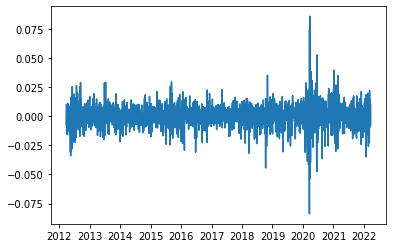

In [50]:

plt.plot(dr_)


In [59]:
float(0.009*252**(0.5))
float(0.01*252**0.5)

0.15874507866387544

In [60]:
import seaborn as sns

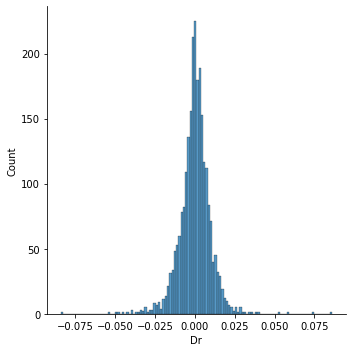

In [61]:
sns.displot(dr_)

In [ ]:
# 연환산 수익률 : -0.0847
# 표준편차:0.0094

In [53]:
q = dr_.std()
q

0.009707644431028816

In [ ]:
'''
iid 가정 : 독립적, 동일 분포
일별 기준 기대수익률 E(R)
연환산 E(R)*252
일표준편차 => 1.6239
분산 = 일별 분산*일수(or 월12)
공분산 0 이니까


과거 data
1년, 3년, 20년 주기 선택 
미래에도 발생할 확률에 대해 

정규성 확인 필요

주가변화 --> 변화율로 추종할 것 
연율환산하는 이유 : 정규성

분산 : iid 가정

p-value: 귀무가설 참일 확률 
95% 라면 기각했을 때 대립가설 믿을 수 있는 확률이 95% 이상임
'''

In [63]:
import FinanceDataReader as fdr

In [64]:
fdr.__version__

'0.9.33'

In [65]:
df = fdr.DataReader('005930',"2021")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


<AxesSubplot:xlabel='Date'>

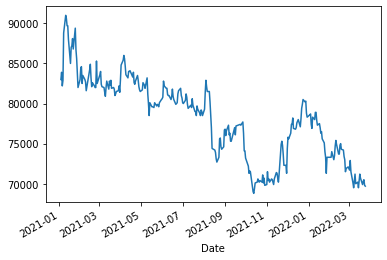

In [66]:
df["Close"].plot()

In [67]:
df_2 = fdr.DataReader('AAPL','2021')

In [68]:
df_2.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-03-18,163.98,160.51,164.48,159.76,123510000.0,0.0209
2022-03-21,165.38,163.51,166.35,163.01,95810000.0,0.0085
2022-03-22,168.82,165.51,169.42,164.91,80940000.0,0.0208
2022-03-23,170.21,167.99,172.64,167.65,97300000.0,0.0082
2022-03-24,174.07,171.06,174.14,170.21,89680000.0,0.0227


In [69]:
krx = fdr.StockListing('KRX')
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7987,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7988,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7989,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7990,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [70]:
krx.groupby('Sector').count()

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
1차 비철금속 제조업,18,18,18,17,18,18,18,17,18
1차 철강 제조업,57,57,57,57,57,57,57,56,57
가구 제조업,8,8,8,8,8,8,8,8,8
가전제품 및 정보통신장비 소매업,2,2,2,2,2,2,2,2,2
가정용 기기 제조업,9,9,9,9,9,9,9,8,9
...,...,...,...,...,...,...,...,...,...
해상 운송업,5,5,5,5,5,5,5,4,5
"해체, 선별 및 원료 재생업",1,1,1,1,1,1,1,1,1
화학섬유 제조업,9,9,9,9,9,9,9,8,9


In [71]:
krx.groupby('Sector').count().sort_values('Symbol',ascending= False)[:30]

,Symbol,Market,Name,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
Sector,,,,,,,,,
소프트웨어 개발 및 공급업,154,154,154,153,154,154,154,150,154
특수 목적용 기계 제조업,146,146,146,146,146,146,146,142,146
전자부품 제조업,129,129,129,128,129,129,129,124,129
자동차 신품 부품 제조업,96,96,96,96,96,96,96,93,96
의약품 제조업,95,95,95,95,95,95,95,91,95
기타 금융업,94,94,94,92,94,94,94,81,94
기타 화학제품 제조업,93,93,93,93,93,93,93,88,93
금융 지원 서비스업,74,74,74,73,74,74,74,25,74
통신 및 방송 장비 제조업,72,72,72,72,72,72,72,67,72


In [72]:
sectors = dict(list(krx.groupby('Sector')))
print('count:', len(sectors))
list(sectors.keys())

count: 161


['1차 비철금속 제조업',
 '1차 철강 제조업',
 '가구 제조업',
 '가전제품 및 정보통신장비 소매업',
 '가정용 기기 제조업',
 '가죽, 가방 및 유사제품 제조업',
 '개인 및 가정용품 임대업',
 '건물 건설업',
 '건물설비 설치 공사업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업',
 '건축자재, 철물 및 난방장치 도매업',
 '경비, 경호 및 탐정업',
 '고무제품 제조업',
 '곡물가공품, 전분 및 전분제품 제조업',
 '골판지, 종이 상자 및 종이용기 제조업',
 '과실, 채소 가공 및 저장 처리업',
 '광고업',
 '교육지원 서비스업',
 '구조용 금속제품, 탱크 및 증기발생기 제조업',
 '귀금속 및 장신용품 제조업',
 '그외 기타 개인 서비스업',
 '그외 기타 운송장비 제조업',
 '그외 기타 전문, 과학 및 기술 서비스업',
 '그외 기타 제품 제조업',
 '금속 주조업',
 '금융 지원 서비스업',
 '기계장비 및 관련 물품 도매업',
 '기록매체 복제업',
 '기반조성 및 시설물 축조관련 전문공사업',
 '기초 의약물질 및 생물학적 제제 제조업',
 '기초 화학물질 제조업',
 '기타 과학기술 서비스업',
 '기타 교육기관',
 '기타 금속 가공제품 제조업',
 '기타 금융업',
 '기타 비금속 광물제품 제조업',
 '기타 비금속광물 광업',
 '기타 사업지원 서비스업',
 '기타 상품 전문 소매업',
 '기타 생활용품 소매업',
 '기타 섬유제품 제조업',
 '기타 식품 제조업',
 '기타 운송관련 서비스업',
 '기타 전기장비 제조업',
 '기타 전문 도매업',
 '기타 전문 서비스업',
 '기타 정보 서비스업',
 '기타 종이 및 판지 제품 제조업',
 '기타 화학제품 제조업',
 '나무제품 제조업',
 '낙농제품 및 식용빙과류 제조업',
 '내화, 비내화 요업제품 제조업',
 '담배 제조업',
 '도로 화물 운송업',
 '도축, 육류 가공 및 저장 처리업',
 '동물용 사료 및 조제식품 제조업',
 '무기

In [73]:
med_sec = sectors['의료용품 및 기타 의약 관련제품 제조업']
print('row count:',len(med_sec))
med_sec.head(10)

row count: 30


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2217,138610,KOSDAQ,나이벡,의료용품 및 기타 의약 관련제품 제조업,"치아미백제,치과용 골이식재",2011-07-13,12월,정종평,NaN,충청북도
2275,142280,KOSDAQ,녹십자엠에스,의료용품 및 기타 의약 관련제품 제조업,"혈액백, 진단시약, 혈액투석액",2014-12-17,12월,안은억,http://www.greencrossms.com,경기도
2305,343090,KONEX,단디바이오,의료용품 및 기타 의약 관련제품 제조업,"패혈증 치료제, 면역항암제 전달기술 등",2020-04-24,12월,"박영민, 윤종선(각자대표)",http:// www.dandibio.com,서울특별시
2653,233250,KONEX,메디안디노스틱,의료용품 및 기타 의약 관련제품 제조업,동물질병 체외진단키트 및 진단용 시약,2017-06-26,12월,오진식,http://www.mediandiagnostics.com,강원도
2704,059210,KOSDAQ,메타바이오메드,의료용품 및 기타 의약 관련제품 제조업,"생체분해성봉합사,근관충전재",2008-04-15,12월,오석송,http://wwwlmeta-biomed.com,충청북도
3997,206640,KOSDAQ,바디텍메드,의료용품 및 기타 의약 관련제품 제조업,면역진단기기 및 카트리지,2014-12-29,12월,최의열,http://www.boditech.co.kr,강원도
4003,064550,KOSDAQ,바이오니아,의료용품 및 기타 의약 관련제품 제조업,"합성유전자,시약및유전자분석장비",2005-12-29,12월,박한오,http://www.bioneer.co.kr,대전광역시
4308,100700,KOSDAQ,세운메디칼,의료용품 및 기타 의약 관련제품 제조업,"의료용구(체액배출기,도뇨관) 제조,도매,수출입",2008-09-30,12월,이재희,http://SEWOONMEDICAL.CO.KR,충청남도
4359,253840,KOSDAQ,수젠텍,의료용품 및 기타 의약 관련제품 제조업,체외진단 기기 및 시약,2019-05-28,12월,손미진,http://www.sugentech.com,대전광역시
4827,096530,KOSDAQ,씨젠,의료용품 및 기타 의약 관련제품 제조업,"호흡기성 병원체 검사제품, 성감염증원인균 검사제품",2010-09-10,12월,천종윤,http://seegene.co.kr,서울특별시
